# 音声認識した自然言語からOpenAI APIで画像を生成

In [ ]:
!pip install openai

In [ ]:
import speech.speech_recognizer as sr
import time

#myRecognizer = sr.Recognizer("en-US")
myRecognizer = sr.Recognizer("ja_JP") # 英語なら"en-US"
myRecognizer.prepare()

In [ ]:
myRecognizer.start()

time.sleep(10)

myRecognizer.stop()

print(myRecognizer.result)

In [ ]:
import openai
import json
from base64 import b64decode

# 前セクションで実行した音声認識内容を使う
# _prompt = "日本アニメのロボットが、万里の長城を走っている"
_prompt = myRecognizer.result

# OpenAI の APIキーを設定しておきましょう
openai.api_key = "************"

png_files = []  # 一次格納画像ファイル
json_file = "image.json"

# OpenAI APIに音声認識内容（文字列）を投げる
response = openai.Image.create(
    prompt = _prompt,   # 音声認識した内容を入れる
    n=3,                # 生成する画像の枚数
    size="256x256",     # 生成する画像サイズ
    response_format="b64_json",
)

# 得られたJSON内容をファイルに書き込む
with open(json_file, mode="w", encoding="utf-8") as file:
    json.dump(response, file)

In [14]:
with open(json_file, mode="r", encoding="utf-8") as file:
    response = json.load(file)

In [15]:
for index, image_dict in enumerate(response["data"]):
    image_data = b64decode(image_dict["b64_json"])
    png_file = f"image-{index}.png"
    with open(png_file, mode="wb") as png:
        png.write(image_data)
        png_files.append(png_file)

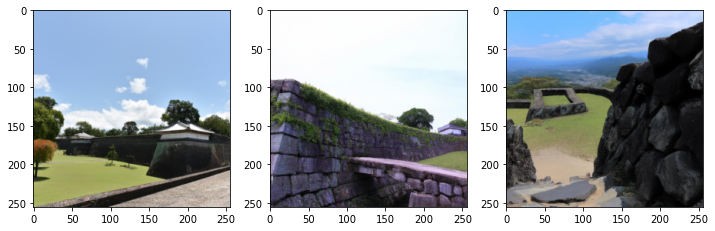

In [18]:
from PIL import Image
#import numpy as np
from matplotlib import pylab as plt
               
l = len(png_files)
plt.figure(figsize=[12,4])
for i in range(l):
    plt.subplot(1,l,i+1)
    pil_img = Image.open(png_files[i]) 
    plt.imshow(pil_img)